#### EJEMPLO: REFERENCIACIÓN ESPACIAL  A GRILLAS PROVENIENTES DE SGEMS:

Escrito por H. Hernández (2019)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Lectura y modificación del archivo saliente de SGEMS:** Al archivo se le debe cambiar la extensión a ".csv"

In [3]:
df_read = pd.read_csv("C:/Users/Heber/Desktop/ko.csv", sep="\s+", header=None) #Lectura del archivo csv
df_read.drop([0, 1, 2, 3],axis=0, inplace=True) #Se eliminan las filas con información de variables (para este ej.:4)
df_read.rename(columns={0: 'VA', 1: 'VAR_VA'}, inplace=True) #Se renombran las columnas
df_read.reset_index(drop=True, inplace=True) #Se resetea la numeración de las filas
df_read.head()

,VA,VAR_VA
0,1.30197,1.84563
1,1.30379,1.82543
2,1.30586,1.80644
3,1.30817,1.7887
4,1.31071,1.77225


In [5]:
df_read.count() # Se debe chequear el nº de datos 

VA        10000
VAR_VA    10000
dtype: int64

2. **Creación de la grilla 2D:** Esta acojerá las estimaciones

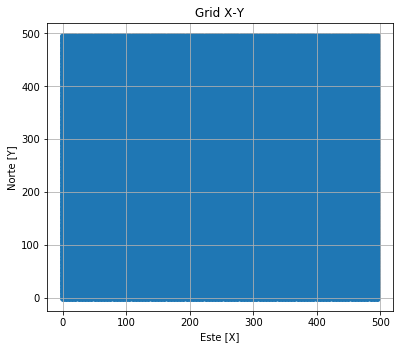

In [27]:
grid_x = np.linspace(0,500, num=100, endpoint=False) #Coord. de origen x, coord. de termino x, nª de celdas x.
grid_y = np.linspace(0,500, num=100, endpoint=False) #Coord. de origen y, coord. de termino y, nª de celdas y.

#En este caso la matriz es de 100 x 100 celdas.

gy = np.array(grid_y) #conversión a un array de numpy 
gx = np.array(grid_x) #conversión a un array de numpy 

yg, xg = np.meshgrid(grid_x, grid_y, indexing='ij') #Creación de la grilla (intersecciones en yg; xg)

x_g = xg.ravel() #aplanamiento de xg
y_g = yg.ravel() #aplanamiento de yg

plt.subplot(111)
plt.scatter(xg,yg)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.title("Grid X-Y")
plt.grid(True)
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=1, wspace=0.2, hspace=0.2)
plt.show()

3. **Creación del DataFrame de salida:** archivo quedará guardado en formato ".csv"

In [28]:
d = {'Este [X]': x_g, 'Norte [Y]': y_g} #Columnas con coordenadas X e Y.
df = pd.DataFrame(data=d) #Creación del dataframe 
df["VA"] = df_read["VA"] #Traspaso de la columna VA al nuevo DataFrame.
df["VAR_VA"] = df_read["VAR_VA"] #Traspaso de la columna VAR_VA al nuevo DataFrame.
df.head()

,Este [X],Norte [Y],VA,VAR_VA
0,0.0,0.0,1.30197,1.84563
1,5.0,0.0,1.30379,1.82543
2,10.0,0.0,1.30586,1.80644
3,15.0,0.0,1.30817,1.7887
4,20.0,0.0,1.31071,1.77225


4. **Visalización de los datos referenciados espacialmente:**

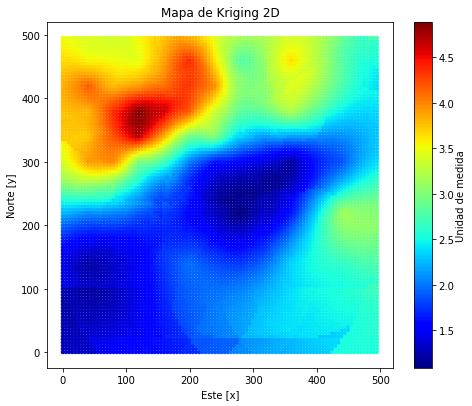

In [31]:
marker_size=10
plt.subplot(111)
plt.scatter(df["Este [X]"], df["Norte [Y]"], marker_size, df["VA"], cmap = plt.cm.jet)
plt.xlabel('Este [x]')
plt.ylabel('Norte [y]')
plt.title('Mapa de Kriging 2D')
plt.grid(False)
cbar=plt.colorbar()
cbar.set_label('Unidad de medida', labelpad=+1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

In [32]:
df.to_csv("C:/Users/Heber/Desktop/" + "grid_set_va.csv", index=False) #salida del archivo .CSV